# Experimento 1: Teorema del límite central

Supongamos que se genera un número grande $N$ de variables aleatorias independientes $X_i, i=1,...,N$, todas distribuidas con las misma distribución de probabilidad, de media $\mu$ y varianza $\sigma^2$. El Teorema del Límite Central nos dice que la variable aleatoria $Y$, construida como la suma de las anteriores:

(1)
$$
Y=X_1 + X_2 +...+X_N
$$

se distribuye de forma gaussiana de media $N_\mu$ y de varianza $\sigma^2 /N$, independientemente de la distribución de las variables $X_i$. Entonces, la probabilidad de que la variable aleatoria $Y$ tome el valor $y$ viene dada por:

(2)
$$
P_{Y}(y)=\frac{1}{\sqrt{2 \pi N \sigma^{2}}} \exp \left[-\frac{(y-N \mu)^{2}}{2 N \sigma^{2}}\right]
$$

Este teorema no deja de ser sorprendente: dice que *sea cual sea* la distribución con la que generamos ciertas variables aleatorias, su suma **siempre es gaussiana**, y tanto más estrecha cuantas más variables sumemos. Es por este teorema por el cual la distribución gaussiana juega un papel tan importante en Física: el efecto cooperativo de muchas factores aleatorios da como resultado una distribución gaussiana.

Para ilustrarlo, hemos creado un applet Java en el cual se generan variables aleatorias, cuyo número se puede elegir, distribuidas de tres formas posibles:
1. Uniformemente entre 1, 2, 3, 4, 5 ó 6 (como si fueran dados)
2. Uniformemente en el intervalo real [0,1]
3. Uniformemente entre 0 ó 1

Pulsando el botón **INICIA** se comienzan a generar variables $Y=\sum_i X_i$ y se construye el histograma de frecuencias de la variable $Y$ normalizado a la unidad, esto es, $P_Y (y)$, representado en color rojo. A la vez se dibuja en azul la distribución predicha por el teorema del límite central, ecuación (2).

Es fácil ver que para $N \gg 1$ la distribución de la variable $Y$ se acerca a la distribución gaussiana dada por la ecuación (2), sea cual sea la distribución de $X_i$. No sucede así, lógicamente, si el número de variables, $N$, es pequeño.

Este applet está inspirado en uno creado por Todd Ogden, de la Universidad de South Carolina.

<video controls src="../Copias_Web/Videos/01-limite_central.mp4"/>

# Pseudocódigo

1. Generar N numeros aleatorios con media Mu y varianza Sigma del tipo seleccionado.
2. Construir Y = X_1 + X_2 +...+ X_N.
3. Dibujar la gaussiana.
4. Dibujar el histograma de frecuencias.

El código sería algo así:

```python
N = seleccionar(numero)
Tipo = seleccionar(dado, intervalo 0 1, moneda)

def Generar_Variable(N, Tipo, tiempo):
    Y[tiempo] = 0
    for i in range(N):
        X[i] = random(Tipo)
        Y[tiempo] += X[i]
    return Y[tiempo]

def Gaussiana(N, Tipo):
    ...
    return y(x)

if (INICIA = Presionado):
    plot( Gaussiana )
    while(tiempo > 0):
        plot( Generar_Variable(N, tipo, tiempo) )
        tiempo += 1
    
```

# Código

## Interfaz

Primero, creamos la interfaz.

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

In [17]:
from IPython.display import display
import ipywidgets

In [18]:
form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([
        Button(
            description='Inicia',
            button_style='success',
            tooltip='Empieza la simulación.',
            layout=Layout(flex='1 1 auto', width='auto')
        ),
        widgets.ToggleButton(
            value=False,
            description='Pausa',
            disabled=False,
            button_style='info',
            tooltip='Cuando está activado se para la simulación. Hay que volver a pulsarlo para que vuelva a calcular.',
            layout=Layout(flex='1 1 auto', width='auto')
        )], 
    layout=form_item_layout),
    
    Box([Label(value='Número de Variables'), IntSlider(min=1, max=60)], layout=form_item_layout),
    Box([Label(value='Tipo de Variables'),
         Dropdown(options=['Dados (1 a 6)', 'Moneda (0 ó 1)', 'De 0 a 1 (contínuo)'])], layout=form_item_layout),
    Box([Label(value='Velocidad'),
         IntSlider(min=1, max=10)], layout=form_item_layout)
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
form

NameError: name 'Box' is not defined

Otra alternativa, quizá con más sentido.

In [2]:
N = IntSlider(min=1, max=60)
Tipos = [('Dados (1 a 6)', 'Dado'), ('Moneda (0 ó 1)', 'Moneda'), ('De 0 a 1 (contínuo)', 'Continuo')]
# He movido aqui los valores a elegir, no sé si así será más facil sacarlos de los widgets

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items2 = [
    Box([
        widgets.ToggleButton(
            value=False,
            description='Inicia / Pausa',
            disabled=False,
            button_style='success',
            tooltip='Empieza o pausa la simulación.',
            layout=Layout(flex='1 1 auto', width='auto')
        ),
        Button(
            description='Reinicia',
            button_style='info',
            tooltip='Reinicializa los valores a los elegidos con los widgets.',
            layout=Layout(flex='1 1 auto', width='auto')
        )], 
    layout=form_item_layout),
    
    Box([Label(value='Número de Variables'), N], layout=form_item_layout),
    Box([Label(value='Tipo de Variables'),
         Dropdown(options=Tipos)], layout=form_item_layout),
    Box([Label(value='Velocidad'),
         IntSlider(min=1, max=10)], layout=form_item_layout)
]

form2 = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
form2

NameError: name 'IntSlider' is not defined

In [3]:
Tipos

NameError: name 'Tipos' is not defined

## Funciones

Segundo, definimos las funciones necesarias.

In [4]:
import random
random.seed(123)

def Genera_Dado():
    result = random.randint(1,6)
    return result
    
def Genera_Moneda():
    result = random.randint(0,1)
    return result

def Genera_Continuo():
    result = random.uniform(0,1)
    return result

def Generar_Variable_Suma(N, Tipo):
    Y = 0
    if Tipo == 'Dado':
        for i in range(N):
            X = Genera_Dado()
            Y += X
    if Tipo == 'Moneda':
        for i in range(N):
            X = Genera_Moneda()
            Y += X
    if Tipo == 'Continuo':
        for i in range(N):
            X = Genera_Continuo()
            Y += X
    return Y


In [5]:
Generar_Variable_Suma(1, 'Continuo')

0.052363598850944326

Intentando tener una output de una de las funciones de forma que use los valores del formulario. **Sin éxito aún**

In [6]:
from IPython.display import display
output = Generar_Variable_Suma(N.value, 'Dado')

display(form, output)

NameError: name 'N' is not defined

## Gráficas y animación

In [ ]:

def Gaussiana(N, Tipo):
    ...
    return y(x)


## Juntarlo todo

In [ ]:
if (INICIA = Presionado):
    plot( Gaussiana )
    while(tiempo > 0):
        plot( Generar_Variable(N, tipo, tiempo) )
        tiempo += 1

# Pruebas

Traceback (most recent call last):
  File "C:\Anaconda\envs\tfg-fises\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Anaconda\envs\tfg-fises\lib\site-packages\matplotlib\animation.py", line 951, in _start
    self._init_draw()
  File "C:\Anaconda\envs\tfg-fises\lib\site-packages\matplotlib\animation.py", line 1743, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "C:\Anaconda\envs\tfg-fises\lib\site-packages\matplotlib\animation.py", line 1766, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-10-5de47b65c41f>", line 24, in animate
    graph_data = open('example.txt','r').read()
FileNotFoundError: [Errno 2] No such file or directory: 'example.txt'


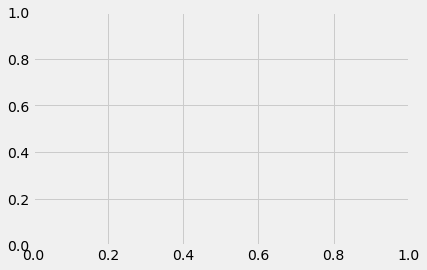

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

style.use('fivethirtyeight')

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

""""
def animate(i):
    xs = []
    ys = []
    for k in range(t):
        xs.append(k)
        ys.append(ye[k])
    ax1.clear()
    ax1.plot(xs, ys)
"""

def animate(i):
    graph_data = open('example.txt','r').read()
    lines = graph_data.split('\n')
    xs = []
    ys = []
    for line in lines:
        if len(line) > 1:
            x, y = line.split(',')
            xs.append(float(x))
            ys.append(float(y))
    ax1.clear()
    ax1.plot(xs, ys)

ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()


In [7]:
import math
from random import gauss

N = 100
media = 0
varianza = 10
t = 20
ye = []

for j in range(t):
    X = [gauss(media, math.sqrt(varianza)) for i in range(N)]

    Y = 0
    for i in range(N):
        Y = Y + X[i]
    #print(Y)
    ye.append(Y)

print(ye)

[40.96521430721678, -26.928210731102695, -49.43692749907795, -14.896172502295949, 13.360607247327177, 32.7744577983638, -34.536896057989324, -10.84633260580224, -9.433730575631847, 22.21762374757277, -27.983664897808502, -1.3640818604012495, 42.47781602331863, 11.463338309275386, 21.621492208233768, 49.726881507090134, -0.36237530099744886, 46.851993986468734, -3.8098640387316687, 2.8532114400123496]


In [8]:
file = open("example.txt","w+")

for i in range(t):
    file.write(str(i+1)+","+str(ye[i])+"\n")

file.close()